# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Uyangoren, Seanuel\
_Student No._: 2021-07208\
_Section_: FX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Seanuel Joash Uyangoren

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

Functions for calculating energy and for metropolies algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt



#function to calculate energy
def calculate_energy(lattice):
  energy = -(lattice[:-1, :] * lattice[1:, :]).sum()    #compute interaction along vertical axis via array slicing
  energy -= (lattice[:, :-1] * lattice[:, 1:]).sum()    #compute interaction along horizontal axis via array slicing
  return energy

#function for the metropolis algorithm
def metropolis(arr_lat, times, energy_2):
  net_energy = np.zeros(times-1)                        #create a zero array for Energy of lattice
  magnetization = np.zeros(times-1)                     #create a zero array for magnetization of lattice

  for i in range(0, times-1):

                                                        #select a random lattice element index
    row = np.random.randint(0, N)
    col = np.random.randint(0, N)

    E_i = calculate_energy(arr_lat)                     #calculate initial energy
    spin_flip = arr_lat[row, col]*-1
    arr_lat[row, col] = spin_flip                       #flip one lattice element
    E_f = calculate_energy(arr_lat)                     #calculate energy after flip

    dE = E_f - E_i                                      #calculate change of energy

    if dE > 0 and np.random.random() < np.exp(-1*dE):   #when E_f > E_i, accept only with certain probability
      arr_lat[row, col] = spin_flip
      energy_2 = energy_2 + dE
    elif dE < 0:                                        #when E_f < E_i, always accept
      arr_lat[row, col] = spin_flip
      energy_2 = energy_2 + dE
    else:                                               #otherwise, restore pre-flip
      arr_lat[row, col] = spin_flip*-1

    magnetization[i] = arr_lat.sum()                    #compute total magnetization of lattice, store it with its time component, i.e., magnetization[0] corresponds to first time step
    net_energy[i] = energy_2                            #compute total energy of lattice, store it with its time component

  return net_energy, magnetization




Main Code

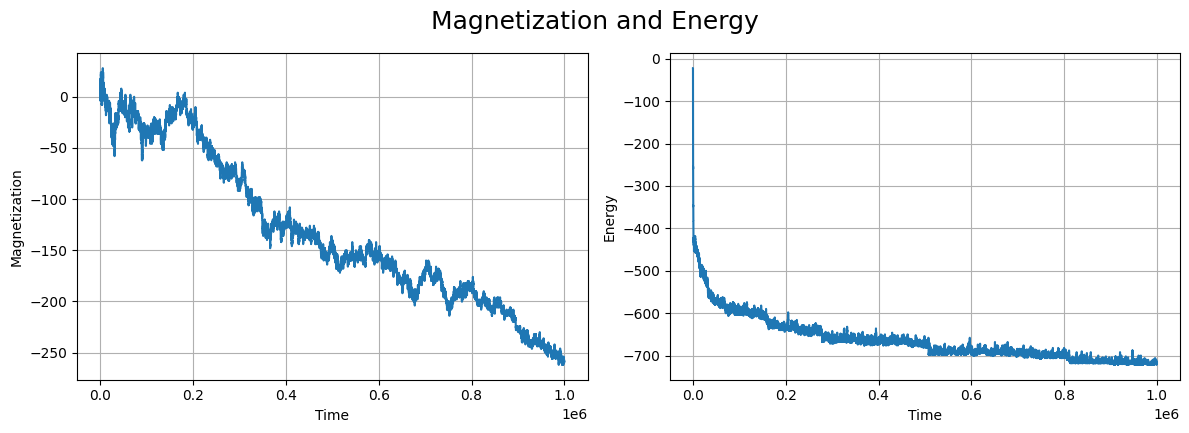

In [14]:
N = 20
iterations = 1000000

lattice = np.zeros((N,N))                 #create a zero 20x20 array, i.e., all elements are zero
randomnum = np.random.rand(N,N)           #generate a 20x20 array with random numbers from 0 to 1


lattice[randomnum>=0.50] = 1
lattice[randomnum<=0.50] = -1


init_lattice = np.zeros((N,N))          #create another zero 20x20 array
init_lattice = lattice.copy()               #store lattice here. This will store the initial lattice because the lattice array will be modified soon

energy_init = calculate_energy(lattice)     #call caculate_energy function and send lattice as parameter. After the processes in the function, the value will be stored at energy_init

energy_data, magnetization_data = metropolis(lattice, iterations, energy_init)     #call metropolis function then store the array containing all energy values with respect to time as energy_data and all magnetization values with respect to time as magnetization_data


fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax = axes[0]                                #plot Magnetization
ax.plot(magnetization_data)
ax.set_xlabel('Time')
ax.set_ylabel(r'Magnetization')
ax.grid()

ax = axes[1]                                #plot Energy
ax.plot(energy_data)
ax.set_xlabel('Time')
ax.set_ylabel(r'Energy')
ax.grid()

fig.tight_layout()
fig.suptitle(r'Magnetization and Energy', y=1.07, size=18)
plt.show()


By running the program several times, we see how the  magnetization is spontaneous and cannot be predetermined. It will never return to zero or switch signs, because such a configuration is less stable than the initial configuration (which has an approximately zero magnetization).

Meanwhile, the energy decreases sharply in the first few time steps. The rate of change then decreases as time further progresses. This shows that the later configurations have lower energy, meaning, the system is more stable. Hence, the algorithm was able to stabilize the initial lattice system